### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import re

import matplotlib.pyplot as plt
import scipy.stats as ss

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

from xgboost import XGBClassifier, plot_importance

### Data Preprocessing and Exploratory Data Analysis

The data: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [2]:
df = pd.read_csv('train.csv')

C:\Users\kaanv\AppData\Local\Temp\ipykernel_19268\2436019669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


<Axes: xlabel='Credit_Score', ylabel='Count'>

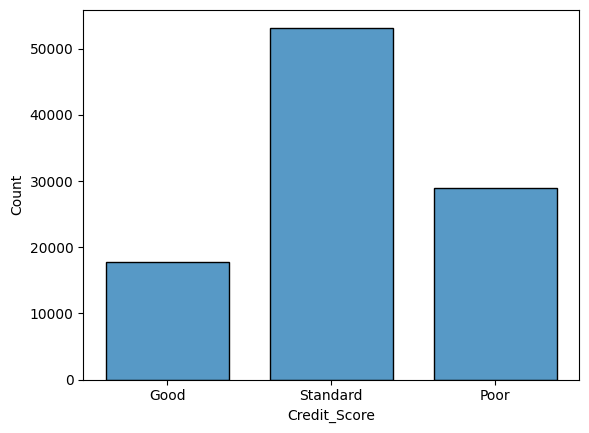

In [5]:
sns.histplot(df['Credit_Score'], shrink=0.75) # data seem imbalanced but it is not too much. Model metrics tell us in the end

AT THE FIRST LOOK SOME COLUMNS SEEM WEIRD
1. ssn 
2. monthly_balance 
3. amount_invested_monthly 
4. occupation

In [6]:
df.columns = df.columns.str.lower() # lower case all columns to make it easier to work with

In [7]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

**for ssn**

In [8]:
df['ssn'].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: ssn, Length: 12501, dtype: int64

**Social security number and name column are irrelevant directly. So they can be removed.**

In [9]:
df.drop(['ssn', 'name'], axis = 1, inplace = True)

**for monthly_balance**

In [10]:
df['monthly_balance'].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: monthly_balance, Length: 98792, dtype: int64

In [11]:
df[df['monthly_balance'] == '__-333333333333333333333333333__'] # this is an unknown value and it is few (9). We can drop it

,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
5545,0x367f,CUS_0x9885,February,17,Developer,41086.4,3660.866667,3,4,6,...,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.544320,201.1429928919469,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Standard
26177,0xaf63,CUS_0x5a90,February,45,Engineer,29728.31,2551.359167,3,4,6,...,Good,917.0,38.198076,31 Years and 9 Months,No,34.496445,198.6115126951797,Low_spent_Large_value_payments,__-333333333333333333333333333__,Good
29158,0xc0d8,CUS_0x288d,July,55,Lawyer,30748.93,2572.410833,1,6,12,...,Good,860.97,40.634250,19 Years and 5 Months,No,43.727774,79.07180674947499,High_spent_Small_value_payments,__-333333333333333333333333333__,Standard
35570,0xe66c,CUS_0x85e9,March,45,_______,20929.295_,1704.107917,5,3,9,...,_,858.09,33.943626,21 Years and 7 Months,No,13798.000000,220.30455197823662,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
38622,0xf84c,CUS_0x2b77,July,21,Doctor,15167.62,1471.968333,4,5,3,...,Good,847.03,28.541848,NaN,NM,9.930809,128.87587207680795,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
60009,0x1759f,CUS_0xc06e,February,30,Journalist,92114.68,7811.223333,3,4,8,...,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,__-333333333333333333333333333__,Standard
75251,0x1ceed,CUS_0x57f3,April,29,Mechanic,60904.59,NaN,3,4,12,...,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.8939566733383,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
82918,0x1fbd8,CUS_0x41bf,July,44,Journalist,61990.52,4900.876667,10,10,25,...,Bad,3618.91,37.718591,13 Years and 8 Months,NM,355.143396,194.28348839148083,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
83255,0x1fdd1,CUS_0x2f7e,August,31,Doctor,126353.04,10635.420000,4,7,19,...,_,859.77,28.442867,31 Years and 9 Months,No,167.043910,549.7661392945339,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Poor


In [12]:
df = df[df['monthly_balance'] != '__-333333333333333333333333333__']

**for amount_invested_monthly**

In [13]:
df['amount_invested_monthly'].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: amount_invested_monthly, Length: 91041, dtype: int64

In [14]:
df['amount_invested_monthly'].replace({'__10000__': 10000}, inplace = True) # 10000 is logical for amount invested monthly so we can remove the underscore directly

In [15]:
df['amount_invested_monthly'].value_counts(dropna=False)

NaN                   4478
10000                 4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: amount_invested_monthly, Length: 91042, dtype: int64

In [16]:
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'])

**for occupation**

In [17]:
df['occupation'].value_counts()

_______          7061
Lawyer           6574
Architect        6355
Engineer         6349
Scientist        6299
Mechanic         6290
Accountant       6271
Developer        6234
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6085
Journalist       6083
Manager          5973
Musician         5911
Writer           5885
Name: occupation, dtype: int64

In [18]:
df['occupation'].replace({'_______': 'Unknown'}, inplace = True)

In [19]:
df['occupation'].value_counts()

Unknown          7061
Lawyer           6574
Architect        6355
Engineer         6349
Scientist        6299
Mechanic         6290
Accountant       6271
Developer        6234
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6085
Journalist       6083
Manager          5973
Musician         5911
Writer           5885
Name: occupation, dtype: int64

In [20]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
monthly_inhand_salary,84990.0,4194.150202,3183.698715,303.645417,1625.558333,3093.745000,5957.448333,15204.633333
num_bank_accounts,99991.0,17.092458,117.410050,-1.000000,3.000000,6.000000,7.000000,1798.000000
num_credit_card,99991.0,22.475983,129.063113,0.000000,4.000000,5.000000,7.000000,1499.000000
interest_rate,99991.0,72.471562,466.443244,1.000000,8.000000,13.000000,20.000000,5797.000000
delay_from_due_date,99991.0,21.069406,14.860516,-5.000000,10.000000,18.000000,28.000000,67.000000
num_credit_inquiries,98026.0,27.756187,193.186100,0.000000,3.000000,6.000000,9.000000,2597.000000
credit_utilization_ratio,99991.0,32.284965,5.116886,20.000000,28.052262,32.305614,36.496341,50.000000
total_emi_per_month,99991.0,1403.097799,8306.314462,0.000000,30.306660,69.252263,161.224249,82331.000000
amount_invested_monthly,95513.0,637.445793,2043.401338,0.000000,74.532858,135.921526,265.731733,10000.000000


**In here not all numerical columns are shown. So it should be arranged mannually as numerical and categorical columns. Also some numerical columns' dtypes seem object because of the irrelevant values. Let's look all of them again**

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,99991,99991,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,99991,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,99991,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,99991,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,99991,16,Unknown,7061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,99991,18939,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_inhand_salary,84990.0,NaN,NaN,NaN,4194.150202,3183.698715,303.645417,1625.558333,3093.745,5957.448333,15204.633333
num_bank_accounts,99991.0,NaN,NaN,NaN,17.092458,117.41005,-1.0,3.0,6.0,7.0,1798.0
num_credit_card,99991.0,NaN,NaN,NaN,22.475983,129.063113,0.0,4.0,5.0,7.0,1499.0
interest_rate,99991.0,NaN,NaN,NaN,72.471562,466.443244,1.0,8.0,13.0,20.0,5797.0


In [22]:
for column in df.columns:
    print(df[column].value_counts())
    print("~" * 50)

0x1602     1
0x19c89    1
0x19cab    1
0x19caa    1
0x19ca5    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: id, Length: 99991, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CUS_0xd40     8
CUS_0x8d2     8
CUS_0x48f     8
CUS_0x29b4    8
CUS_0x5ae3    8
             ..
CUS_0x57f3    7
CUS_0x2f7e    7
CUS_0x2b77    7
CUS_0x288d    7
CUS_0x5a90    7
Name: customer_id, Length: 12500, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
January     12500
May         12500
June        12500
March       12499
April       12499
August      12499
February    12497
July        12497
Name: month, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
38      2833
28      2829
31      2805
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: age, Length: 1788, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unknown          7061
Lawyer           65

**Age and month columns are thought categorical, Id and Customer Id columns are irrelevant**

In [23]:
"""
Attention!

Some columns seem object dtype but they are actually numerical. We will convert them to numerical dtype.
Some characters causes this problem like underscore, comma, etc.
"""


categorical_columns = [
    'credit_score',
    'payment_behaviour',
    'payment_of_min_amount',
    'credit_history_age',
    'credit_mix',
    'type_of_loan',
    'age',
    'month'
]

numerical_columns = [
    'monthly_balance',
    'amount_invested_monthly',
    'total_emi_per_month',
    'credit_utilization_ratio',
    'outstanding_debt',
    'num_credit_inquiries',
    'changed_credit_limit',
    'num_of_delayed_payment',
    'delay_from_due_date',
    'num_of_loan',
    'interest_rate',
    'num_credit_card',
    'num_bank_accounts',
    'monthly_inhand_salary',
    'annual_income',
]

In [24]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   monthly_balance           98791 non-null  object 
 1   amount_invested_monthly   95513 non-null  float64
 2   total_emi_per_month       99991 non-null  float64
 3   credit_utilization_ratio  99991 non-null  float64
 4   outstanding_debt          99991 non-null  object 
 5   num_credit_inquiries      98026 non-null  float64
 6   changed_credit_limit      99991 non-null  object 
 7   num_of_delayed_payment    92989 non-null  object 
 8   delay_from_due_date       99991 non-null  int64  
 9   num_of_loan               99991 non-null  object 
 10  interest_rate             99991 non-null  int64  
 11  num_credit_card           99991 non-null  int64  
 12  num_bank_accounts         99991 non-null  int64  
 13  monthly_inhand_salary     84990 non-null  float64
 14  annual

**lets check object dtypes**

In [25]:
object_but_numerical_cols = [col for col in df.columns if df[col].dtype == 'object' and col in numerical_columns] # find object dtype but actually numerical columns

In [26]:
object_but_numerical_cols

['annual_income',
 'num_of_loan',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'outstanding_debt',
 'monthly_balance']

In [27]:
def remove_underscore(val):
    if '_' in str(val):
        return val.strip('_')
    return val

In [28]:
for col in object_but_numerical_cols:
    """
    Remove underscore from numerical columns and convert them to numeric dtype
    """
    df[col] = df[col].apply(remove_underscore)
    df[col] = pd.to_numeric(df[col])

In [29]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   monthly_balance           98791 non-null  float64
 1   amount_invested_monthly   95513 non-null  float64
 2   total_emi_per_month       99991 non-null  float64
 3   credit_utilization_ratio  99991 non-null  float64
 4   outstanding_debt          99991 non-null  float64
 5   num_credit_inquiries      98026 non-null  float64
 6   changed_credit_limit      97900 non-null  float64
 7   num_of_delayed_payment    92989 non-null  float64
 8   delay_from_due_date       99991 non-null  int64  
 9   num_of_loan               99991 non-null  int64  
 10  interest_rate             99991 non-null  int64  
 11  num_credit_card           99991 non-null  int64  
 12  num_bank_accounts         99991 non-null  int64  
 13  monthly_inhand_salary     84990 non-null  float64
 14  annual

In [30]:
df[categorical_columns].describe().T

,count,unique,top,freq
credit_score,99991,3,Standard,53167
payment_behaviour,99991,7,Low_spent_Small_value_payments,25509
payment_of_min_amount,99991,3,Yes,52323
credit_history_age,90962,404,15 Years and 11 Months,446
credit_mix,99991,4,Standard,36476
type_of_loan,88583,6260,Not Specified,1408
age,99991,1788,38,2833
month,99991,8,January,12500


**all columns seem formal by unique values to encoding or cutting except type_of_loan and age. Lets dive into it**

In [31]:
df['payment_behaviour'].replace({'!@9#%8': 'Unknown'}, inplace = True) # replace unknown value (apx 7k) with Unknown to make it easier to work with

In [32]:
df['type_of_loan'].value_counts(dropna=False) # There is a multi class problem here. We will deal with it later

NaN                                                                                                                                            11408
Not Specified                                                                                                                                   1408
Credit-Builder Loan                                                                                                                             1279
Personal Loan                                                                                                                                   1272
Debt Consolidation Loan                                                                                                                         1264
                                                                                                                                               ...  
Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan                                     

**It seems some records have more than one loan type. So we can explore all types and evaluate each as a binary feature**

In [33]:
df['type_of_loan'].replace({np.nan:'Not Specified'}, inplace = True)

In [34]:
loan_types = {} # create a dictionary to store loan types and their counts by looping through the customers

In [35]:
for loans in df['type_of_loan']:
    loans = loans.split(',')
    loans = [x.strip() for x in loans]
    
    # for getting rid of 'and' in last item of loans  
    if len(loans) > 1:
        loans[-1] = loans[-1][4:]
        
    for loan in loans:
        if loan in loan_types:
            loan_types[loan] += 1
        else:
            loan_types[loan] = 1

In [36]:
loan_types # We will back when encoding

{'Auto Loan': 37989,
 'Credit-Builder Loan': 40437,
 'Personal Loan': 38887,
 'Home Equity Loan': 39098,
 'Not Specified': 51022,
 'Mortgage Loan': 38931,
 'Student Loan': 38962,
 'Debt Consolidation Loan': 38775,
 'Payday Loan': 40566}

**It is going to be handled in missing value solution**

In [37]:
df['age'].value_counts()

38      2833
28      2829
31      2805
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: age, Length: 1788, dtype: int64

In [38]:
df['age'] = df['age'].apply(remove_underscore)
df['age'] = pd.to_numeric(df['age'])

<Axes: ylabel='Frequency'>

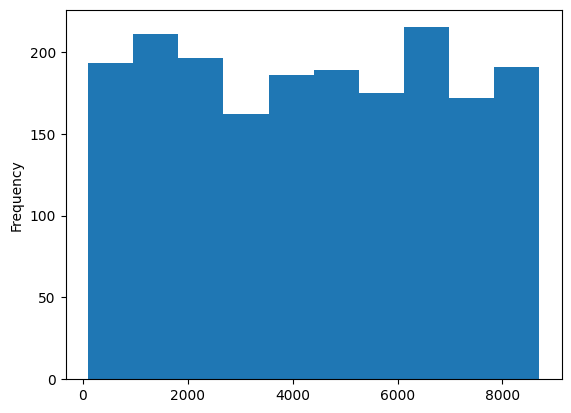

In [39]:
df[df['age'] > 100]['age'].plot.hist() # Bigger than 100 is not possible (assumpiton). We can turn them into NaN to impute later

<Axes: ylabel='Frequency'>

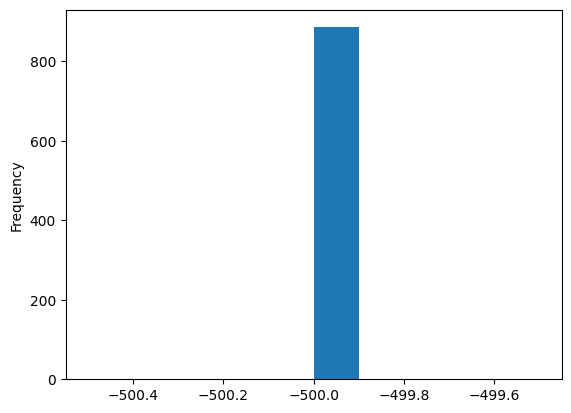

In [40]:
df[df['age'] < 0]['age'].plot.hist() # Smaller than 0 is not possible (assumpiton). We can turn them into NaN to impute later

**I think taking squareroot of ages which bigger than 100 seems logical to me**

**For ages which are negatives are going to be equal to median**

In [41]:
df.loc[(df['age'] > 100) & (df['age'] < 0), 'age'] = np.nan

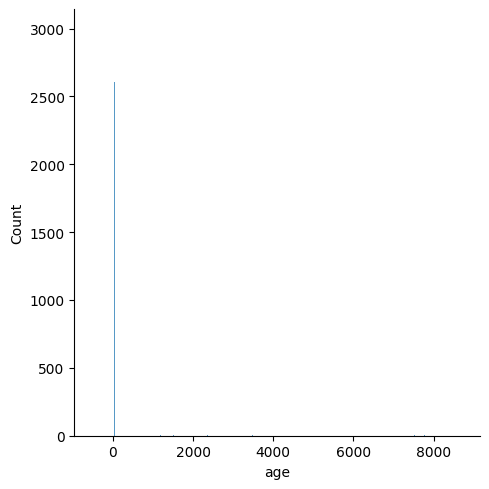

In [42]:
sns.displot(df['age'])

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99991.0,110.656489,6.862752e+02,-500.000000,24.000000,33.000000,42.000000,8.698000e+03
annual_income,99991.0,176426.789475,1.429682e+06,7005.930000,19456.495000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,84990.0,4194.150202,3.183699e+03,303.645417,1625.558333,3093.745000,5957.448333,1.520463e+04
num_bank_accounts,99991.0,17.092458,1.174101e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
num_credit_card,99991.0,22.475983,1.290631e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,99991.0,72.471562,4.664432e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
num_of_loan,99991.0,3.009941,6.265069e+01,-100.000000,1.000000,3.000000,5.000000,1.496000e+03
delay_from_due_date,99991.0,21.069406,1.486052e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,92989.0,30.925400,2.260427e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,97900.0,10.388885,6.789529e+00,-6.490000,5.320000,9.400000,14.870000,3.697000e+01


**Here still some features ought to be handled. (a few min and max values interesting but I can not see properly are they going to be handled in outliers detection part. Just in case I'm gonna check.) Outliers in test data should be irrelevant for us but we are still on cleaning.**

In [44]:
df[df['num_bank_accounts'] < 0] # There is a negative value in num_bank_accounts illogically.

,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
30330,0xc7b8,CUS_0x4f2a,March,39.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.70,40.586736,22 Years and 5 Months,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,0xc7b9,CUS_0x4f2a,April,40.0,Engineer,128305.76,NaN,-1,6,1,...,Good,1151.70,39.369401,22 Years and 6 Months,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,0xc7ba,CUS_0x4f2a,May,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.70,28.702053,22 Years and 7 Months,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,0xc7bb,CUS_0x4f2a,June,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.70,34.808390,22 Years and 8 Months,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,0xc7bc,CUS_0x4f2a,July,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.70,35.206427,NaN,No,42850.000000,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,0xc7bd,CUS_0x4f2a,August,40.0,Engineer,22136920.00,NaN,-1,6,1,...,_,1151.70,38.278518,22 Years and 10 Months,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
43689,0x115ff,CUS_0xa878,February,54.0,Engineer,117851.07,9870.922500,-1,6,7,...,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.144454,Unknown,588.947796,Poor
43690,0x11600,CUS_0xa878,March,54.0,Engineer,117851.07,9870.922500,-1,6,7,...,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.319789,High_spent_Large_value_payments,1084.772461,Poor
43691,0x11601,CUS_0xa878,April,54.0,Engineer,117851.07,9870.922500,-1,6,7,...,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563923,High_spent_Small_value_payments,779.528327,Poor
43692,0x11602,CUS_0xa878,May,54.0,Engineer,117851.07,9870.922500,-1,6,7,...,Good,607.78,46.244581,20 Years and 9 Months,No,0.000000,NaN,High_spent_Large_value_payments,1037.506338,Poor


**A few customer have -1 num_bank_accounts so lets check other months of same customer**

In [45]:
df[df['customer_id'] == 'CUS_0x4f2a'] # check the same customer to look num_bank_accounts

,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
30328,0xc7b6,CUS_0x4f2a,January,39.0,Engineer,128305.76,10434.146667,0,7,1,...,Good,1151.7,28.555646,22 Years and 3 Months,No,196.587321,268.772082,High_spent_Medium_value_payments,828.055264,Standard
30329,0xc7b7,CUS_0x4f2a,February,39.0,Engineer,128305.76,10434.146667,0,7,1,...,Good,1151.7,30.343064,22 Years and 4 Months,No,196.587321,588.773285,Low_spent_Small_value_payments,548.054061,Standard
30330,0xc7b8,CUS_0x4f2a,March,39.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,0xc7b9,CUS_0x4f2a,April,40.0,Engineer,128305.76,NaN,-1,6,1,...,Good,1151.7,39.369401,22 Years and 6 Months,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,0xc7ba,CUS_0x4f2a,May,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,0xc7bb,CUS_0x4f2a,June,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,0xc7bc,CUS_0x4f2a,July,40.0,Engineer,128305.76,10434.146667,-1,6,1,...,Good,1151.7,35.206427,NaN,No,42850.000000,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,0xc7bd,CUS_0x4f2a,August,40.0,Engineer,22136920.00,NaN,-1,6,1,...,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good


**It seems -1 and 0 values have to be 1 at least.**

In [46]:
df.loc[:, 'num_bank_accounts'] = df.loc[:, 'num_bank_accounts'].replace({-1: 1, 0: 1}) # replace -1 and 0 with 1 (min number of bank accounts)

In [47]:
df['num_bank_accounts'].value_counts(bins=20)

(-0.798, 90.85]      98738
(270.55, 360.4]         78
(809.65, 899.5]         78
(450.25, 540.1]         76
(989.35, 1079.2]        73
(540.1, 629.95]         70
(1528.45, 1618.3]       68
(1258.9, 1348.75]       68
(1079.2, 1169.05]       68
(90.85, 180.7]          66
(1708.15, 1798.0]       65
(629.95, 719.8]         64
(1438.6, 1528.45]       64
(1348.75, 1438.6]       63
(1618.3, 1708.15]       62
(719.8, 809.65]         61
(899.5, 989.35]         61
(180.7, 270.55]         58
(360.4, 450.25]         56
(1169.05, 1258.9]       54
Name: num_bank_accounts, dtype: int64

<Axes: xlabel='num_bank_accounts', ylabel='Density'>

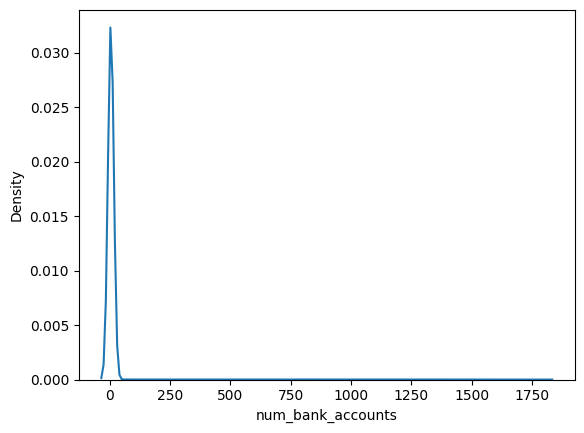

In [48]:
sns.kdeplot(df['num_bank_accounts'])

<Axes: xlabel='num_bank_accounts', ylabel='Density'>

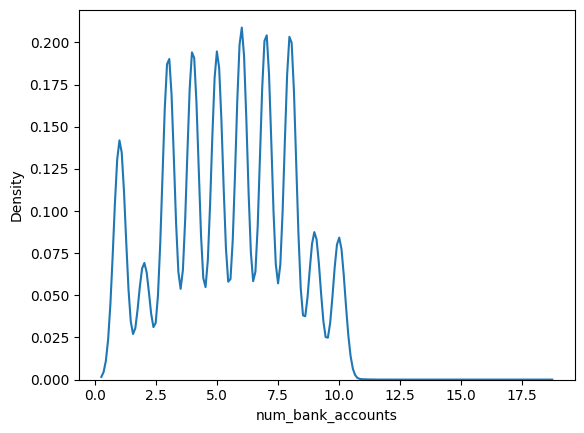

In [49]:
sns.kdeplot(df.loc[df['num_bank_accounts'] < 20, 'num_bank_accounts'])

**I think we can assume 11 is maximum value of this dataset. So which are bigger than 11 would be equal to 11**

In [50]:
df.loc[df['num_bank_accounts'] > 11, 'num_bank_accounts'] = 11 # replace values bigger than 11 with 11 to balance the data

<Axes: xlabel='num_bank_accounts', ylabel='Count'>

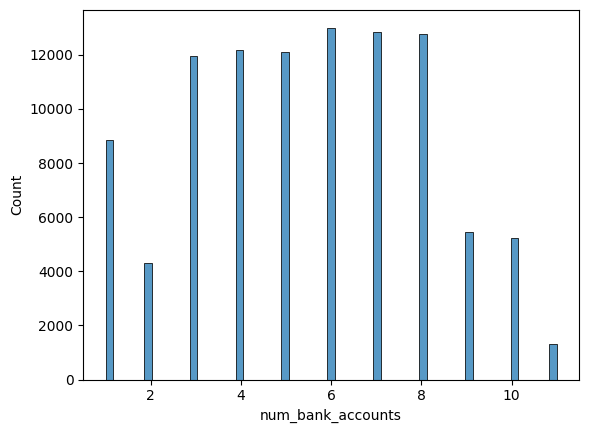

In [51]:
sns.histplot(df['num_bank_accounts'])

**num of Loan**

<Axes: xlabel='num_of_loan', ylabel='Density'>

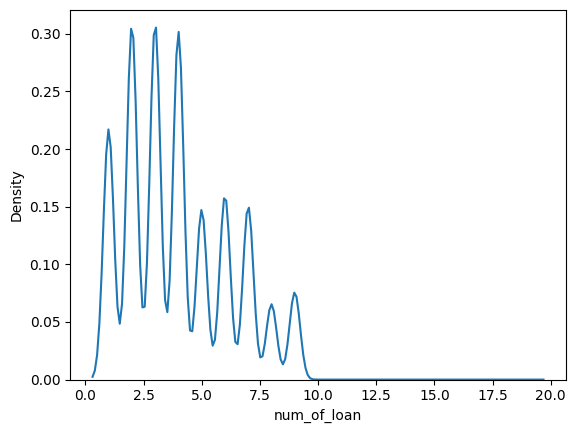

In [52]:
sns.kdeplot(df.loc[(df['num_of_loan'] < 20) & (df['num_of_loan'] > 0), 'num_of_loan'])

**max will be 10, min will be 0**

In [53]:
df.loc[df['num_of_loan'] > 10, 'num_of_loan'] = 10 # replace values bigger than 10 with 10 to balance the data

In [54]:
df.loc[df['num_of_loan'] < 0, 'num_of_loan'] = 0 # negative values are not possible

<Axes: xlabel='num_of_loan', ylabel='Density'>

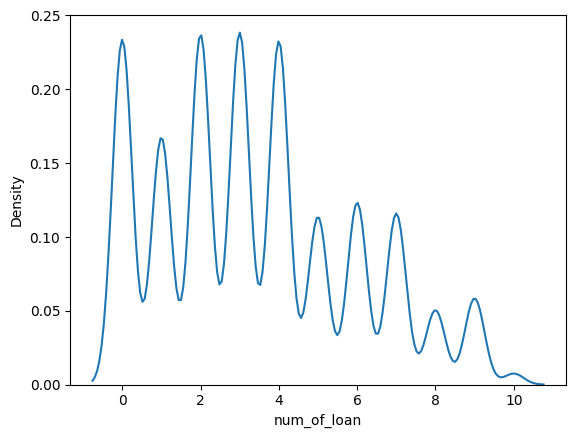

In [55]:
sns.kdeplot(df['num_of_loan'])

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99991.0,110.656489,6.862752e+02,-500.000000,24.000000,33.000000,42.000000,8.698000e+03
annual_income,99991.0,176426.789475,1.429682e+06,7005.930000,19456.495000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,84990.0,4194.150202,3.183699e+03,303.645417,1625.558333,3093.745000,5957.448333,1.520463e+04
num_bank_accounts,99991.0,5.485524,2.572328e+00,1.000000,3.000000,6.000000,7.000000,1.100000e+01
num_credit_card,99991.0,22.475983,1.290631e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,99991.0,72.471562,4.664432e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
num_of_loan,99991.0,3.427328,2.529600e+00,0.000000,1.000000,3.000000,5.000000,1.000000e+01
delay_from_due_date,99991.0,21.069406,1.486052e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,92989.0,30.925400,2.260427e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,97900.0,10.388885,6.789529e+00,-6.490000,5.320000,9.400000,14.870000,3.697000e+01


<Axes: xlabel='delay_from_due_date', ylabel='Density'>

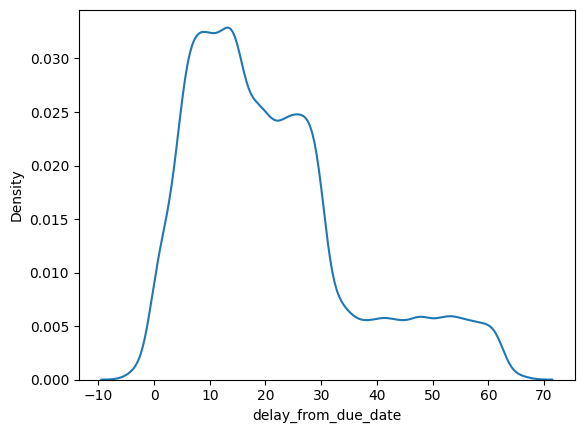

In [57]:
sns.kdeplot(df['delay_from_due_date'])

**negative delay may be early payment?**

<Axes: xlabel='num_of_delayed_payment', ylabel='Density'>

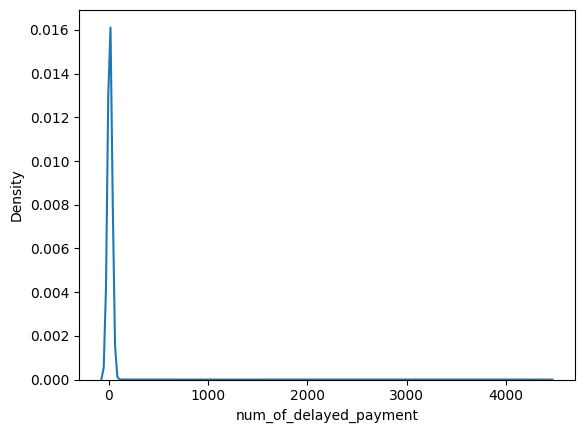

In [58]:
sns.kdeplot(df['num_of_delayed_payment'])

<Axes: xlabel='num_of_delayed_payment', ylabel='Density'>

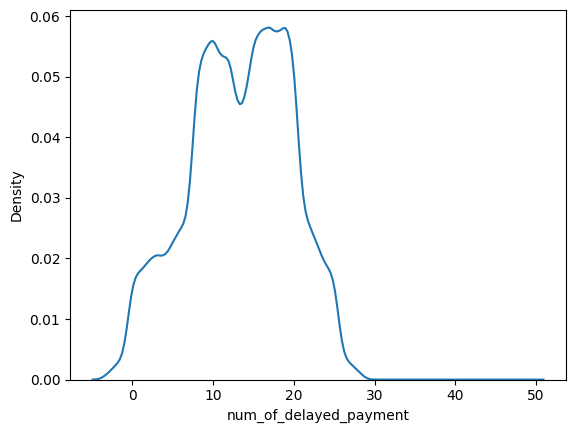

In [59]:
sns.kdeplot(df.loc[df['num_of_delayed_payment'] < 50, 'num_of_delayed_payment'])

<Axes: xlabel='num_of_delayed_payment', ylabel='Density'>

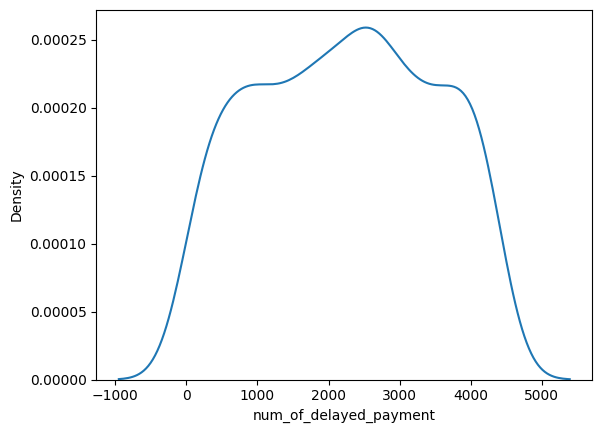

In [60]:
sns.kdeplot(df.loc[df['num_of_delayed_payment'] > 30, 'num_of_delayed_payment'])

In [61]:
"""
Max value is like 5000. It seems that is not possible. We can apply sqrt to the values bigger than 70 to balance the data.
The 70 because of the max value sqrt(5000) = 70.71. A kind of scaling.
"""

df.loc[df['num_of_delayed_payment'] > 70, 'num_of_delayed_payment'] = df[df['num_of_delayed_payment'] > 70]['num_of_delayed_payment'].apply(lambda x: math.ceil(math.sqrt(x)))

In [62]:
df.loc[df['num_of_delayed_payment'] < 0, 'num_of_delayed_payment'] = 0 # negative values are not possible

<Axes: xlabel='num_of_delayed_payment', ylabel='Density'>

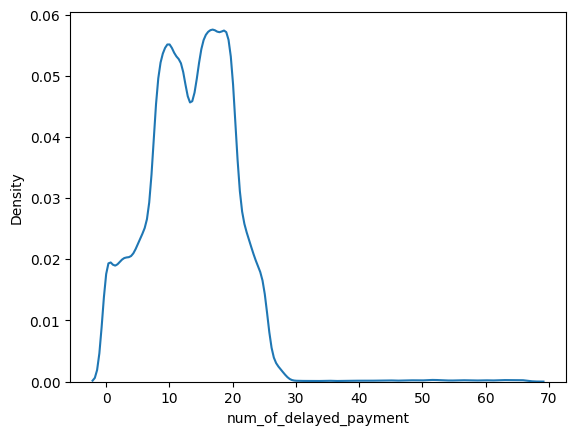

In [63]:
sns.kdeplot(df['num_of_delayed_payment'])

**check changed_credit_limit**

<Axes: xlabel='changed_credit_limit', ylabel='Density'>

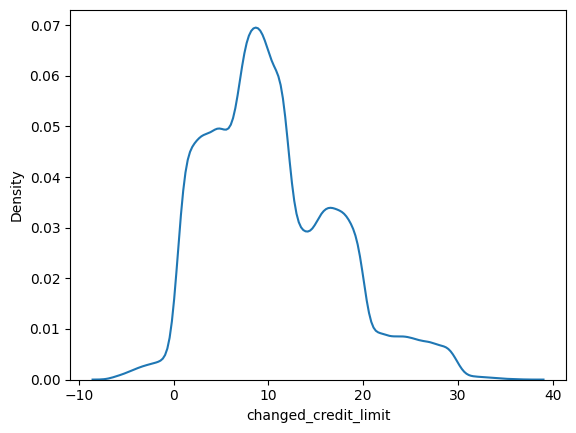

In [64]:
sns.kdeplot(df['changed_credit_limit'])

**OUTLIER DETECTION STEP**

Reminding! --> numerical_columns = [
    'monthly_balance',
    'amount_invested_monthly',
    'total_emi_per_month',
    'credit_utilization_ratio',
    'outstanding_debt',
    'num_credit_inquiries',
    'changed_credit_limit',
    'num_of_delayed_payment',
    'delay_from_due_date',
    'num_of_loan',
    'interest_rate',
    'num_credit_card',
    'num_bank_accounts',
    'monthly_inhand_salary',
    'annual_income',
]

In [65]:
"""
Normally 1.5 IQR is used to detect outliers. But we can use 2 IQR to involve more data.
"""

def remove_outliers(numeric_cols):
    result = []
    for col in numeric_cols:
        dct = {}
        Q1 = np.percentile(df[~df[col].isnull()][col], 25,
                           method = 'midpoint')

        Q3 = np.percentile(df[~df[col].isnull()][col], 75,
                           method = 'midpoint')
        IQR = Q3 - Q1
        
        upper = Q3 + (2*IQR)
        lower = Q1 - (2*IQR) 
        
        dct['col'] = col
        dct['upper'] = upper
        dct['lower'] = lower
        result.append(dct)

    return result

In [66]:
result = remove_outliers(numerical_columns)

In [67]:
result

[{'col': 'monthly_balance',
  'upper': 870.5755555535982,
  'lower': -130.20598720015266},
 {'col': 'amount_invested_monthly',
  'upper': 648.1294832578645,
  'lower': -307.8648923719328},
 {'col': 'total_emi_per_month',
  'upper': 423.05942633972194,
  'lower': -231.52851673533632},
 {'col': 'credit_utilization_ratio',
  'upper': 53.384497217536065,
  'lower': 11.164105820264766},
 {'col': 'outstanding_debt', 'upper': 4706.635, 'lower': -2194.34},
 {'col': 'num_credit_inquiries', 'upper': 21.0, 'lower': -9.0},
 {'col': 'changed_credit_limit', 'upper': 33.97, 'lower': -13.779999999999998},
 {'col': 'num_of_delayed_payment', 'upper': 36.0, 'lower': -9.0},
 {'col': 'delay_from_due_date', 'upper': 64.0, 'lower': -26.0},
 {'col': 'num_of_loan', 'upper': 13.0, 'lower': -7.0},
 {'col': 'interest_rate', 'upper': 44.0, 'lower': -16.0},
 {'col': 'num_credit_card', 'upper': 13.0, 'lower': -2.0},
 {'col': 'num_bank_accounts', 'upper': 15.0, 'lower': -5.0},
 {'col': 'monthly_inhand_salary',
  'upp

In [68]:
# remove outliers
for ob in result:
    col = ob['col']
    upper = float(ob['upper'])
    lower = float(ob['lower'])
    
    sub_df = df.loc[(df[col] > upper) | (df[col] < lower), :]
    df.drop(sub_df.index, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75520 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        75520 non-null  object 
 1   customer_id               75520 non-null  object 
 2   month                     75520 non-null  object 
 3   age                       75520 non-null  float64
 4   occupation                75520 non-null  object 
 5   annual_income             75520 non-null  float64
 6   monthly_inhand_salary     64221 non-null  float64
 7   num_bank_accounts         75520 non-null  int64  
 8   num_credit_card           75520 non-null  int64  
 9   interest_rate             75520 non-null  int64  
 10  num_of_loan               75520 non-null  int64  
 11  type_of_loan              75520 non-null  object 
 12  delay_from_due_date       75520 non-null  int64  
 13  num_of_delayed_payment    70193 non-null  float64
 14  change

**imputing**

In [70]:
# mean is for normal distributed data, median is for skewed distributed data, knn is for age data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_knn = KNNImputer(n_neighbors=2)

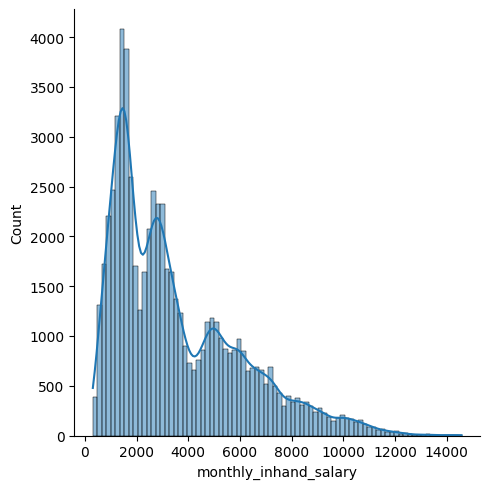

In [71]:
sns.displot(df[~df['monthly_inhand_salary'].isna()]['monthly_inhand_salary'], kde=True)

In [72]:
# impute missing values by looking at the skewness of the data
for col in numerical_columns:
    if df[col].isnull().values.any():
        skewness = ss.skew(df[~df[col].isna()][col], axis=0, bias=True)
        if skewness >= 1:
            df[col] = imp_median.fit_transform(df[[col]])
        else:
            df[col] = imp_mean.fit_transform(df[[col]])

In [73]:
# impute missing values for age
df['age'] = imp_knn.fit_transform(df['age'].values.reshape(-1, 1))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75520 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        75520 non-null  object 
 1   customer_id               75520 non-null  object 
 2   month                     75520 non-null  object 
 3   age                       75520 non-null  float64
 4   occupation                75520 non-null  object 
 5   annual_income             75520 non-null  float64
 6   monthly_inhand_salary     75520 non-null  float64
 7   num_bank_accounts         75520 non-null  int64  
 8   num_credit_card           75520 non-null  int64  
 9   interest_rate             75520 non-null  int64  
 10  num_of_loan               75520 non-null  int64  
 11  type_of_loan              75520 non-null  object 
 12  delay_from_due_date       75520 non-null  int64  
 13  num_of_delayed_payment    75520 non-null  float64
 14  change

**time to handle `age` and `credit_history_age` features**

In [75]:
df['age'].value_counts()

28.0      2314
38.0      2263
26.0      2224
34.0      2197
27.0      2194
          ... 
5008.0       1
4214.0       1
548.0        1
4244.0       1
1342.0       1
Name: age, Length: 1378, dtype: int64

https://www.americanexpress.com/en-us/credit-cards/credit-intel/credit-score-by-age-state/

In [76]:
df['credit_history_age'].dtype

dtype('O')

In [77]:
def get_age_years(age_string):
    """
    credit_history_age is like 1 year 2 months. We need to get the first value to reduce the variety.
    Finally these values drop the same range as before 
    """
    return int(age_string.split()[0])

**some values in `credit_history_age` is not string**

In [78]:
df['credit_history_age'].fillna('0 years', inplace=True) # fill NaN with 0 years

In [79]:
df['credit_history_age'] = df['credit_history_age'].apply(get_age_years)

In [80]:
df['credit_history_age'].value_counts(bins=5)

(13.2, 19.8]     19177
(6.6, 13.2]      15414
(19.8, 26.4]     14193
(-0.034, 6.6]    13826
(26.4, 33.0]     12910
Name: credit_history_age, dtype: int64

In [81]:
df['payment_behaviour'] = df['payment_behaviour'].str.lower()

In [82]:
df['credit_mix'].replace({'_':'absent'}, inplace=True)
df['credit_mix'] = df['credit_mix'].str.lower()

In [83]:
# turn some numerical columns to classes
df['credit_history_age_group'] = pd.cut(df['credit_history_age'], bins=[float('-inf'), 0, 5, 10, 20, 30, float('inf')], labels=['new', 'committed', 'long-term', 'devoted', 'loyal', 'staunch'])
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 50, 101], labels=['young', 'middle-aged', 'senior', 'old'])

**encoding categorical features**

In [84]:
categories_to_encode = ['credit_history_age_group', # 6 feature 
                        "age_group",   # 4 feature
                        "payment_behaviour", # 7 feature
                        "payment_of_min_amount", # 3 feature
                        "credit_mix", # 4 feature
                        "month",    # 12 feature
                        "occupation" # 9 feature
                       ]

In [85]:
ohe = OneHotEncoder(drop="if_binary")
transformed = ohe.fit_transform(df[categories_to_encode])

In [86]:
# Concatinate encoded part with all_df
df[ohe.get_feature_names_out()] = transformed.toarray()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75520 entries, 0 to 99999
Data columns (total 77 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id                                                  75520 non-null  object  
 1   customer_id                                         75520 non-null  object  
 2   month                                               75520 non-null  object  
 3   age                                                 75520 non-null  float64 
 4   occupation                                          75520 non-null  object  
 5   annual_income                                       75520 non-null  float64 
 6   monthly_inhand_salary                               75520 non-null  float64 
 7   num_bank_accounts                                   75520 non-null  int64   
 8   num_credit_card                                     75520 non-null

**loan_type is multi labeled**

In [88]:
df['type_of_loan'].value_counts()

Not Specified                                                                                                                    8587
Personal Loan                                                                                                                     950
Debt Consolidation Loan                                                                                                           893
Student Loan                                                                                                                      892
Credit-Builder Loan                                                                                                               869
                                                                                                                                 ... 
Student Loan, Personal Loan, Payday Loan, and Payday Loan                                                                           1
Student Loan, Mortgage Loan, Credit-Builder Loan, and Credit-B

In [89]:
loan_types

{'Auto Loan': 37989,
 'Credit-Builder Loan': 40437,
 'Personal Loan': 38887,
 'Home Equity Loan': 39098,
 'Not Specified': 51022,
 'Mortgage Loan': 38931,
 'Student Loan': 38962,
 'Debt Consolidation Loan': 38775,
 'Payday Loan': 40566}

In [90]:
def discard_and_key(string):
    """
    remove and key from the string
    """
    string = re.sub(r'\s+and\s+', ' ', string)
    return string

In [91]:
df['type_of_loan'] = df['type_of_loan'].apply(discard_and_key)

In [92]:
df['type_of_loan'].value_counts()

Not Specified                                                                                                                8587
Personal Loan                                                                                                                 950
Debt Consolidation Loan                                                                                                       893
Student Loan                                                                                                                  892
Credit-Builder Loan                                                                                                           869
                                                                                                                             ... 
Student Loan, Personal Loan, Payday Loan, Payday Loan                                                                           1
Student Loan, Mortgage Loan, Credit-Builder Loan, Credit-Builder Loan                     

In [93]:
q = df['type_of_loan'].str.get_dummies(sep=', ') # get encoded version of type_of_loan

In [94]:
df = pd.concat([df, q], axis=1)

In [95]:
df.drop(columns=['type_of_loan'], inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75520 entries, 0 to 99999
Data columns (total 85 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id                                                  75520 non-null  object  
 1   customer_id                                         75520 non-null  object  
 2   month                                               75520 non-null  object  
 3   age                                                 75520 non-null  float64 
 4   occupation                                          75520 non-null  object  
 5   annual_income                                       75520 non-null  float64 
 6   monthly_inhand_salary                               75520 non-null  float64 
 7   num_bank_accounts                                   75520 non-null  int64   
 8   num_credit_card                                     75520 non-null

In [97]:
df.columns

Index(['id', 'customer_id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score', 'credit_history_age_group', 'age_group',
       'credit_history_age_group_committed',
       'credit_history_age_group_devoted',
       'credit_history_age_group_long-term', 'credit_history_age_group_loyal',
       'credit_history_age_group_new', 'credit_history_age_group_staunch',
       'age_group_middle-aged', 'age_group_old', 'age_group_senior',
       'age_group_young', 'age_group_nan',
       'payment_behaviour_high_spent_large_value_payments',
     

In [98]:
df.drop(categories_to_encode, axis=1, inplace=True)

In [99]:
df.drop(['age', 'credit_history_age'], axis=1, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75520 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  75520 non-null  object 
 1   customer_id                                         75520 non-null  object 
 2   annual_income                                       75520 non-null  float64
 3   monthly_inhand_salary                               75520 non-null  float64
 4   num_bank_accounts                                   75520 non-null  int64  
 5   num_credit_card                                     75520 non-null  int64  
 6   interest_rate                                       75520 non-null  int64  
 7   num_of_loan                                         75520 non-null  int64  
 8   delay_from_due_date                                 75520 non-null  int64  


In [101]:
c = [col for col in df.columns if df[col].dtypes == 'O'] # last check for object columns

In [102]:
c

['id', 'customer_id', 'credit_score']

**scaling the features except encoded features**

In [103]:
df.columns

Index(['id', 'customer_id', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance',
       'credit_score', 'credit_history_age_group_committed',
       'credit_history_age_group_devoted',
       'credit_history_age_group_long-term', 'credit_history_age_group_loyal',
       'credit_history_age_group_new', 'credit_history_age_group_staunch',
       'age_group_middle-aged', 'age_group_old', 'age_group_senior',
       'age_group_young', 'age_group_nan',
       'payment_behaviour_high_spent_large_value_payments',
       'payment_behaviour_high_spent_medium_value_payments',
       'payment_behaviour_high_spent_small_value_payments',
       'payment_behaviour_low_spent_large_value_payments',
      

In [104]:
df.drop(columns=['id', 'customer_id'], axis=1, inplace=True) # unnecessary columns

In [105]:
# Check for skewness to decide which scaling method to use. Normalize for skewed data, Standardize for normal distributed data
cols_to_standardize = [] 
cols_to_normalize = []

for col in df.drop('credit_score', axis=1).columns:
    skewness = ss.skew(df[col], axis=0, bias=True)
    print(f"column: {col}, skewness: {skewness}")

    if skewness > 1 or skewness < -1:
        cols_to_normalize.append(col)
    else:
        cols_to_standardize.append(col)

column: annual_income, skewness: 1.0942040315027892
column: monthly_inhand_salary, skewness: 1.2874947771395957
column: num_bank_accounts, skewness: -0.0450526140909617
column: num_credit_card, skewness: 0.23038981291845373
column: interest_rate, skewness: 0.44659556280412116
column: num_of_loan, skewness: 0.44339909740113925
column: delay_from_due_date, skewness: 0.9325100049434133
column: num_of_delayed_payment, skewness: -0.20969964715730566
column: changed_credit_limit, skewness: 0.6138587650225679
column: num_credit_inquiries, skewness: 0.36264617551865397
column: outstanding_debt, skewness: 1.0588586964207876
column: credit_utilization_ratio, skewness: 0.0028299557863030456
column: total_emi_per_month, skewness: 1.3821687375182843
column: amount_invested_monthly, skewness: 1.5947060431822397
column: monthly_balance, skewness: 1.061532143419647
column: credit_history_age_group_committed, skewness: 3.889715509132151
column: credit_history_age_group_devoted, skewness: 0.513773277106

In [106]:
print(cols_to_normalize)
print(cols_to_standardize)


['annual_income', 'monthly_inhand_salary', 'outstanding_debt', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 'credit_history_age_group_committed', 'credit_history_age_group_long-term', 'credit_history_age_group_loyal', 'credit_history_age_group_new', 'credit_history_age_group_staunch', 'age_group_old', 'age_group_senior', 'age_group_nan', 'payment_behaviour_high_spent_large_value_payments', 'payment_behaviour_high_spent_medium_value_payments', 'payment_behaviour_high_spent_small_value_payments', 'payment_behaviour_low_spent_large_value_payments', 'payment_behaviour_low_spent_medium_value_payments', 'payment_behaviour_low_spent_small_value_payments', 'payment_behaviour_unknown', 'payment_of_min_amount_NM', 'credit_mix_absent', 'credit_mix_bad', 'credit_mix_good', 'month_April', 'month_August', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'occupation_Accountant', 'occupation_Architect', 'occupation_Developer', 'occupati

### Model Development

In [107]:
np.sum(pd.isna(df).sum()) # last check for any missing

0

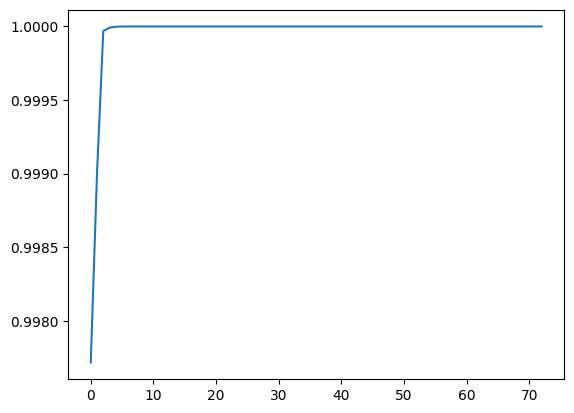

In [108]:
# Check how many features are needed to approximate performance with using less features 
pca = PCA()

X_pca = pca.fit_transform(df.drop('credit_score', axis=1))

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # I do not really understand why the percentages like .9995...

In [109]:
def show_metrics(model_name, y_pred, y_test,  best_params=None):
    """
    show metrics for less usage of code
    """
    print(f"Model: {model_name}")
    if best_params != None:    
        print(f"Best Parameters: {best_params}")
    
    print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    print("-" * 75)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: LR
Best Parameters: {'LR__C': 0.1, 'LR__class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      5162
           1       0.82      0.59      0.69      9104
           2       0.48      0.84      0.61      2726

    accuracy                           0.66     16992
   macro avg       0.65      0.71      0.65     16992
weighted avg       0.71      0.66      0.67     16992



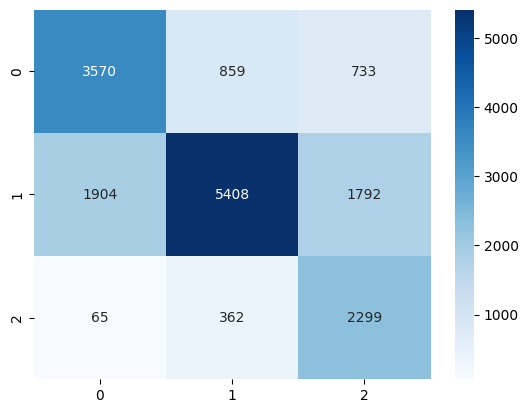

---------------------------------------------------------------------------
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Model: KNN
Best Parameters: {'KNN__n_neighbors': 29}
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      5162
           1       0.77      0.81      0.79      9104
           2       0.65      0.69      0.67      2726

    accuracy                           0.75     16992
   macro avg       0.73      0.72      0.73     16992
weighted avg       0.75      0.75      0.75     16992



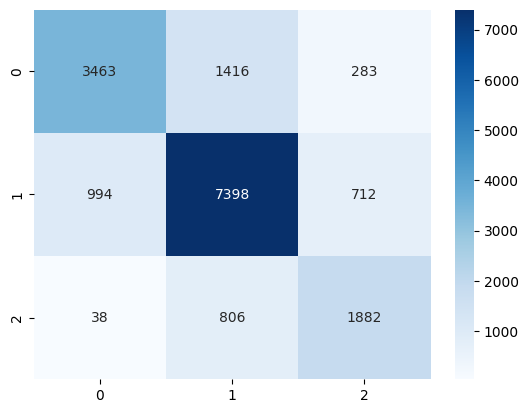

---------------------------------------------------------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: DT
Best Parameters: {'DT__criterion': 'entropy', 'DT__max_depth': 7}
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      5162
           1       0.73      0.74      0.74      9104
           2       0.55      0.65      0.60      2726

    accuracy                           0.69     16992
   macro avg       0.66      0.67      0.66     16992
weighted avg       0.70      0.69      0.69     16992



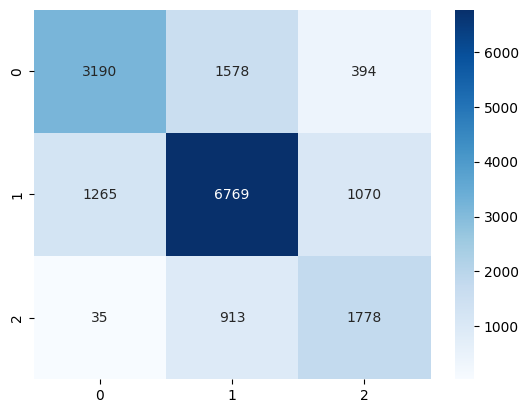

---------------------------------------------------------------------------
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Model: RF
Best Parameters: {'RF__criterion': 'entropy', 'RF__max_depth': 13, 'RF__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      5162
           1       0.87      0.88      0.87      9104
           2       0.75      0.83      0.79      2726

    accuracy                           0.84     16992
   macro avg       0.82      0.83      0.83     16992
weighted avg       0.84      0.84      0.84     16992



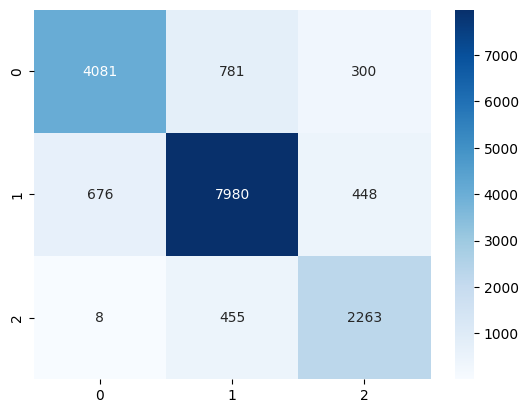

---------------------------------------------------------------------------
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Model: XGB
Best Parameters: {'XGB__learning_rate': 0.05, 'XGB__max_depth': 7, 'XGB__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5162
           1       0.80      0.80      0.80      9104
           2       0.66      0.76      0.71      2726

    accuracy                           0.77     16992
   macro avg       0.75      0.76      0.75     16992
weighted avg       0.77      0.77      0.77     16992



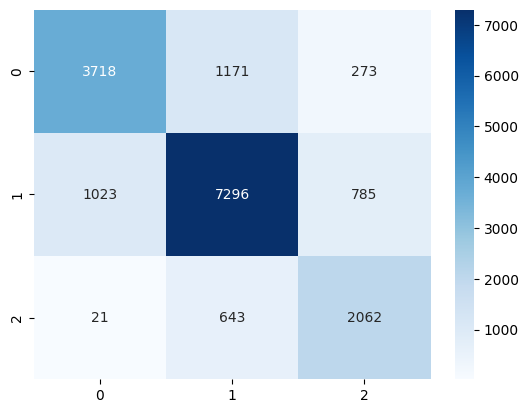

---------------------------------------------------------------------------
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Model: ADAB
Best Parameters: {'ADAB__learning_rate': 0.5, 'ADAB__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      5162
           1       0.69      0.74      0.72      9104
           2       0.54      0.57      0.55      2726

    accuracy                           0.67     16992
   macro avg       0.64      0.63      0.63     16992
weighted avg       0.67      0.67      0.66     16992



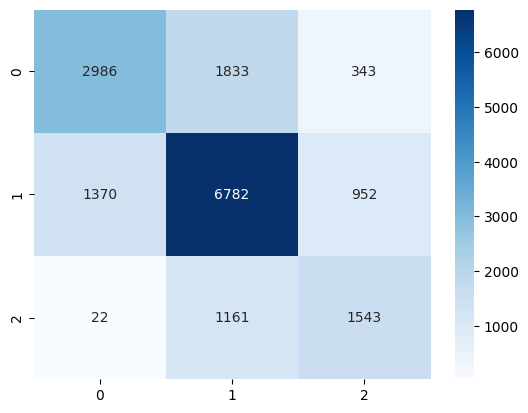

---------------------------------------------------------------------------


In [110]:
# train with logistic regression
X = df.drop(['credit_score'], axis=1)
y = df['credit_score']
y = y.replace({'Poor':0, 'Standard':1, 'Good':2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.225, random_state=42, stratify=y)

models_df = pd.DataFrame(columns=['model name', 'f1 score', 'accuracy', 'roc_auc'])

MODELS = {
    'LR': LogisticRegression(max_iter=1000), 
    'KNN': KNeighborsClassifier(), 
    'DT': DecisionTreeClassifier(), 
    'RF': RandomForestClassifier(), 
    'XGB': XGBClassifier(objective='multi:softmax'),
    'ADAB': AdaBoostClassifier(),
}

param_grid = {
    'LR': {'LR__C': [0.01, 0.1, 1, 5, 10], 
           'LR__class_weight': [None, 'balanced']},

    'KNN': {'KNN__n_neighbors': range(5, 30, 2)},

    'DT': {'DT__max_depth': range(5, 14, 2), 
           'DT__criterion': ['gini', 'entropy']},

    'RF': {'RF__max_depth': range(5, 14, 2),
           'RF__n_estimators': [50, 100, 200],
           'RF__criterion': ['gini', 'entropy']},

    'XGB': {'XGB__max_depth': range(3, 12, 2), 
            'XGB__learning_rate': [0.01, 0.05, 0.15, 0.3], 
            'XGB__n_estimators': [50, 100, 200]},

    'ADAB': {'ADAB__n_estimators': [50, 100, 200], 
             'ADAB__learning_rate': [0.01, 0.5, 1, 3],},
}

# column transformer to use both scaling methods for different columns
ct = ColumnTransformer([
    ('scale', MinMaxScaler(), cols_to_normalize),
    ('standardize', StandardScaler(), cols_to_standardize)
])

#skf = StratifiedKFold(n_splits=4) # validation for ensure that the model is not giving good results only for one split

for i, (name, model) in enumerate(MODELS.items()):

    pipe = Pipeline([
        ('ct', ct), # Step 1: Standardize or Normalize the data
        ('pca', PCA(n_components='mle')), # Step 2: Apply PCA for dimensionality reduction
        (name, model) # Step 3: Run the model
    ])

    params = param_grid[name]
    
    search = GridSearchCV(pipe, params, cv=3, n_jobs=2, scoring='f1_weighted', verbose=1)
    search.fit(X, y)
   
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test) 

    pred_prob = best_model.predict_proba(X_test)

    show_metrics(name, y_pred, y_test, search.best_params_)
    models_df.loc[i] = [name, f1_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred), roc_auc_score(y_test, pred_prob, multi_class='ovr')]

Model: VOTING_CLASSIFIER
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5162
           1       0.82      0.84      0.83      9104
           2       0.71      0.79      0.75      2726

    accuracy                           0.80     16992
   macro avg       0.78      0.79      0.78     16992
weighted avg       0.80      0.80      0.80     16992



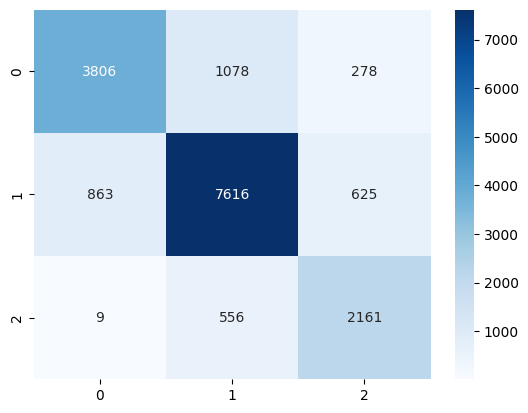

---------------------------------------------------------------------------


In [112]:
# try voting classifier with the best models
vc = VotingClassifier(estimators=[
         ('knn', KNeighborsClassifier(n_neighbors=29)), 
         ('rf', RandomForestClassifier(criterion= 'entropy', max_depth=13, n_estimators=200)), 
         ('xgb', XGBClassifier(objective='multi:softmax', learning_rate=0.05, max_depth=7, n_estimators= 100)),
         ], 
         voting='soft')

pipe = Pipeline([
    ('ct', ct), # Step 1: Standardize or Normalize the data
    ('pca', PCA(n_components='mle')), # Step 2: Apply PCA for dimensionality reduction
    ('vc', vc) # Step 3: Run the model
])

pipe.fit(X, y)
y_pred = pipe.predict(X_test) 

pred_prob = pipe.predict_proba(X_test)
models_df.loc[len(models_df)] = ['VC', f1_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred), roc_auc_score(y_test, pred_prob, multi_class='ovr')]

show_metrics('VOTING_CLASSIFIER', y_pred, y_test)

In [113]:
models_df.style.background_gradient(cmap='Greens', low=0.5, high=0.01)

,model name,f1 score,accuracy,roc_auc
0,LR,0.668734,0.663665,0.819019
1,KNN,0.749034,0.749941,0.893650
2,DT,0.691376,0.690737,0.840994
3,RF,0.843103,0.842985,0.958624
4,XGB,0.770038,0.769539,0.912552
5,ADAB,0.664074,0.665666,0.794642
6,VC,0.799404,0.799376,0.932833


In [ ]:
# For feature importance
model = RandomForestClassifier(criterion= 'entropy', max_depth=13, n_estimators=200) # for feature importance
model.fit(X, y)

<Axes: >

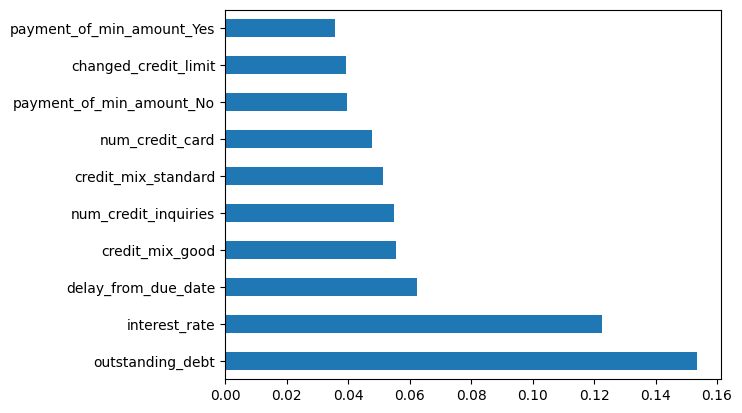

In [117]:
feat_importances = pd.Series(model.feature_importances_, index=df.drop('credit_score', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')

Credit mix indicates that how many kind the customer use credit. Like mortgage, car, etc. It tells us the variety
Outstanding debt indicates that the total principal as well as interest amount of a debt that has yet to be paid